In [37]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
random.seed(0)

#text preprocessing
import string

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

#models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

1. Creation of the dataset

In [2]:
file = 'Graduate - HEADLINES dataset (2019-06).json'
df = pd.read_json(file, lines=True)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


2. Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [6]:
df.groupby('is_sarcastic').describe()

headline         \
                count unique   
is_sarcastic                   
0               14985  14951   
1               11724  11651   

                                                                      
                                                            top freq  
is_sarcastic                                                          
0                   the 20 funniest tweets from women this week   10  
1             'no way to prevent this,' says only nation whe...    8

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021472206488>,
      dtype=object)

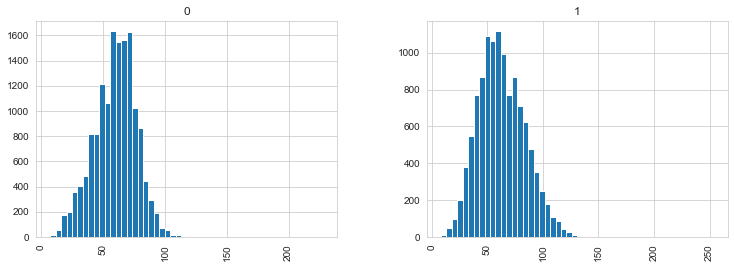

In [7]:
sns.set_style('whitegrid')
df['length']=df['headline'].apply(len)
df.hist(column='length', by='is_sarcastic', bins=50,figsize=(12,4))

In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021474186D88>,
      dtype=object)

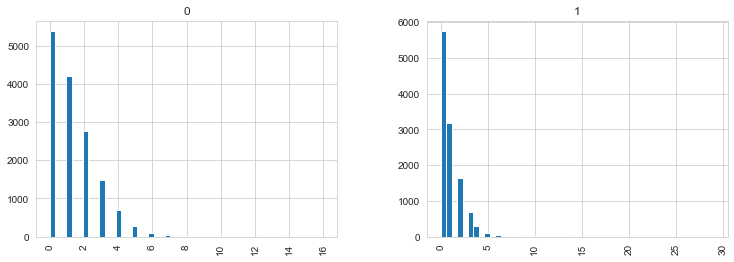

In [9]:
def get_punctuation(headline):
     punct = [char for char in headline if char in string.punctuation]
     punct = ''.join(punct)
     return punct

df['punctuation'] = df['headline'].apply(get_punctuation)
df['len_punctuation'] = df['punctuation'].apply(len)
df.hist(column='len_punctuation', by='is_sarcastic', bins=50,figsize=(12,4))

3. Feature Engineering

In [4]:
features = df['headline']
labels = df['is_sarcastic']

3. text preprocessing

In [5]:
ps = PorterStemmer()

nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\galan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
features

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [7]:
#removing stopwords
def stop_word(headline):
        words = word_tokenize(headline)
        return ' '.join([word for word in words if word not in stopwords.words('english')])

features = features.apply(stop_word)

In [8]:
features

0        former versace store clerk sues secret 'black ...
1        'roseanne ' revival catches thorny political m...
2        mom starting fear son 's web series closest th...
3        boehner wants wife listen , come alternative d...
4        j.k. rowling wishes snape happy birthday magic...
                               ...                        
26704                    american politics moral free-fall
26705                             america 's best 20 hikes
26706                                    reparations obama
26707    israeli ban targeting boycott supporters raise...
26708                            gourmet gifts foodie 2014
Name: headline, Length: 26709, dtype: object

In [9]:
#stemming
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [10]:
features

0        former versac store clerk sue secret 'black co...
1        'roseann ' reviv catch thorni polit mood , bet...
2        mom start fear son 's web seri closest thing g...
3        boehner want wife listen , come altern debt-re...
4            j.k. rowl wish snape happi birthday magic way
                               ...                        
26704                        american polit moral free-fal
26705                              america 's best 20 hike
26706                                          repar obama
26707    isra ban target boycott support rais alarm abroad
26708                              gourmet gift foodi 2014
Name: headline, Length: 26709, dtype: object

In [11]:
#removing punctuation
def punctuation(headline):
    nopunc = [char for char in headline if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

features = features.apply(punctuation)

TF-IDF

In [14]:
tv = TfidfVectorizer()
features = list(features)
features = tv.fit_transform(features).toarray()

In [15]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

4.Classification model

In [31]:
# model 1 - multinomial Naive Bayes

mnb = MultinomialNB()
cv_mnb = cross_validate(mnb, features, labels, cv=5)
cv_mnb['test_score']

array([0.78603519, 0.78266567, 0.785848  , 0.78697117, 0.77663359])

In [36]:
round(cv_mnb['test_score'].mean(),2)

0.78

In [29]:
# model 2 - Random Forest Classifier

rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
cv_rfc = cross_validate(rfc, features, labels, cv=5)
cv_rfc['test_score']

array([0.74316735, 0.73773867, 0.7319356 , 0.7500936 , 0.73169818])

In [30]:
round(cv_rfc['test_score'].mean(),2)

0.74